In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import polars as pl
import lightgbm as lgb
import joblib
from lightgbm import LGBMRegressor

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

pl.Config.set_tbl_rows(-1)
pl.Config.set_tbl_cols(-1)

polars.config.Config

In [2]:
multi_index = ['date_id', 'time_id', 'symbol_id']
feature_col = [f'feature_{i:02d}' for i in range(79)]
weight = ['weight']
target = ['responder_6']
start_date = 1100
interest_col = multi_index + feature_col + weight + target

In [3]:
df = (pl.scan_parquet('data/train.parquet')
      .select(interest_col)
      .filter(pl.col('date_id') >= start_date)
      .sort(['time_id','symbol_id', 'date_id'])
      .collect())
print(df.shape)

(22142032, 84)


In [4]:
df.head()

date_id,time_id,symbol_id,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,weight,responder_6
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
1100,0,0,0.347117,0.496246,-0.252778,0.300495,2.283821,-0.358535,1.499545,0.163361,0.522466,11,7,76,-1.018732,0.160037,-0.695186,null,0.966189,null,-1.041664,-1.200563,1.08635,-0.198352,0.497893,1.451918,-1.182287,-1.02238,0.891338,0.824079,0.987703,0.071278,0.675787,-0.179226,null,null,-0.432981,-0.387139,-1.033333,0.115463,0.144211,null,-0.104414,null,null,-1.438618,null,-2.239299,1.204056,-2.054071,-0.987095,-0.350367,null,0.554282,null,null,-0.963888,null,-2.11783,0.946514,null,-0.378454,-0.231735,0.747711,-0.366339,-0.179765,-0.334015,-1.798993,-1.743881,-0.904236,0.557061,-0.345155,-0.721083,-0.315582,-0.879035,null,null,-0.435363,-0.307379,-0.185087,-0.343539,2.135293,0.814512
1101,0,0,0.458568,-0.05264,-0.044876,0.124223,2.819707,-0.746395,0.270162,0.232489,0.638483,11,7,76,-0.859027,0.695877,-0.356197,null,0.300569,null,-1.081869,-1.249594,0.586737,-0.283532,0.351779,1.07356,-0.974062,-0.908026,0.737549,0.87567,0.616378,0.052371,0.482981,-0.269024,null,null,-0.101967,-0.30544,0.745993,0.124049,0.335976,null,0.019273,null,null,-0.228946,null,-1.508707,0.995993,-1.614079,-0.025769,0.214689,null,1.344184,null,null,-1.083561,null,-1.226218,1.564233,null,0.315116,0.102745,0.659961,-0.140479,0.042491,-0.028724,-1.427209,-1.99307,-0.862814,1.568264,-0.094396,-0.809437,-0.145835,-0.684791,null,null,-0.122062,-0.378493,-0.36432,-0.260619,1.913215,1.233719
1102,0,0,-0.924107,-0.005654,-0.351597,0.177467,1.782808,-0.358065,1.188774,0.016624,0.265344,11,7,76,-0.999161,0.110789,-0.65208,null,0.301829,null,-1.153858,-1.065186,0.974558,-0.194348,0.38082,1.054688,-1.315119,-0.898351,0.836672,1.21611,0.762122,0.040156,0.834075,-0.190838,null,null,-0.33753,-0.624695,1.290966,-0.049641,0.113045,null,1.646006,null,null,0.464151,null,-1.10607,1.410999,0.175117,0.647192,0.644478,null,1.319367,null,null,-1.253928,null,-1.585656,0.817495,null,0.516926,0.26192,1.283564,-0.192199,0.189079,0.075683,-1.616316,-2.663486,-0.726235,0.637721,-0.327914,-0.737294,-0.472547,-0.835208,null,null,-0.227344,-0.227257,-0.272589,-0.33,1.891726,2.321886
1103,0,0,-0.637707,-0.531114,-0.246699,-0.725956,1.852648,-1.118986,0.536087,-0.836424,0.447028,11,7,76,-0.984007,0.481383,-0.513255,null,-0.192344,null,-1.108322,-2.026325,0.955866,-0.284038,0.20773,1.162604,-1.362539,-0.996801,1.082227,1.367174,0.820316,0.037444,0.507828,-0.206999,null,null,-0.652582,-0.831582,1.674956,-0.131519,0.242814,null,0.928749,null,null,-0.169242,null,-0.712679,1.790911,-0.733613,0.503852,0.381471,null,1.452315,null,null,-0.094713,null,-1.089065,1.779444,null,-0.005956,0.011606,1.430091,-0.098793,0.226568,0.019392,-1.343824,-1.403943,-0.999949,0.202171,-0.590695,-1.265092,0.366579,-0.447884,null,null,-0.211842,-0.193011,-0.200402,-0.250034,1.930577,2.057374
110

In [5]:
N = len(df)
split = int(N * 0.5)
train_df = df.slice(0, split)
valid_df = df.slice(split, N)
print(train_df.shape, valid_df.shape)

(11071016, 84) (11071016, 84)


In [6]:
X_train = train_df.drop(multi_index + weight + target).to_pandas()
y_train = train_df[target].to_pandas()
train_weight = train_df[weight].to_numpy().flatten()

X_valid = valid_df.drop(multi_index + weight + target).to_pandas()
y_valid = valid_df[target].to_pandas()
valid_weight = valid_df[weight].to_numpy().flatten()

In [7]:
parm = {'n_estimators':2000, 'max_depth':6, 'num_leaves':64, 'learning_rate':0.05,
        'colsample_bytree':0.5, 'importance_type':'gain', 'boosting_type':'dart' ,
        'random_state':0, 'n_jobs':-1}
model1 = LGBMRegressor(**parm)

In [8]:
model1.fit(X_train, y_train, sample_weight=train_weight)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.871611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19442
[LightGBM] [Info] Number of data points in the train set: 11071016, number of used features: 79
[LightGBM] [Info] Start training from score 0.008351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

LGBMRegressor(boosting_type='dart', colsample_bytree=0.5,
              importance_type='gain', learning_rate=0.05, max_depth=6,
              n_estimators=2000, n_jobs=-1, num_leaves=64, random_state=0)

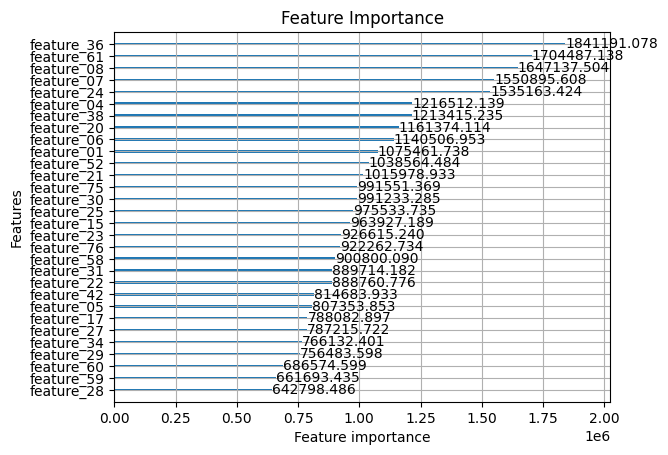

In [9]:
lgb.plot_importance(model1, max_num_features=30, importance_type='gain')  # 或 'gain'
plt.title("Feature Importance")
plt.show()

In [ ]:
sudo_y_valid = model1.predict(X_valid)

In [11]:
new_X = pd.concat([X_train, X_valid], axis=0)
new_y = np.concatenate([y_train.values.flatten(), sudo_y_valid], axis=0)
new_weight = np.concatenate((train_weight, valid_weight), axis=0)
print(new_X.shape, new_y.shape, new_weight.shape)

(22142032, 79) (22142032,) (22142032,)


In [12]:
parm = {'n_estimators':2000, 'max_depth':6, 'num_leaves':64, 'learning_rate':0.05,
        'colsample_bytree':0.5, 'importance_type':'gain', 'boosting_type':'dart' ,'random_state':0, 'n_jobs':-1}
model2 = LGBMRegressor(**parm)

In [13]:
model2.fit(new_X, new_y, sample_weight=np.concatenate([train_weight, valid_weight]))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.173308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19442
[LightGBM] [Info] Number of data points in the train set: 22142032, number of used features: 79
[LightGBM] [Info] Start training from score 0.007503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMRegressor(boosting_type='dart', colsample_bytree=0.5,
              importance_type='gain', learning_rate=0.05, max_depth=6,
              n_estimators=2000, n_jobs=-1, num_leaves=64, random_state=0)

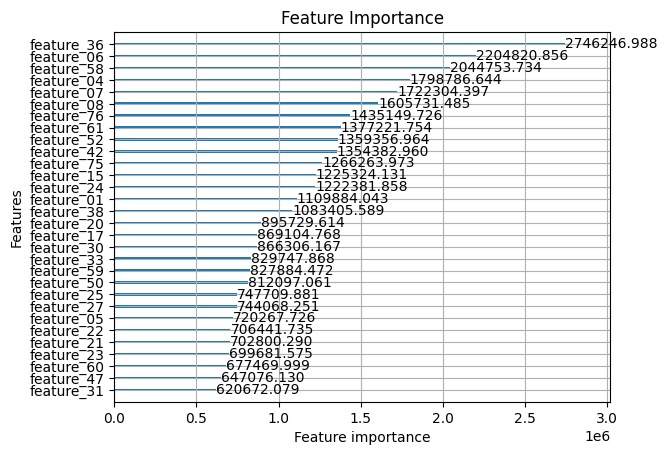

In [16]:
lgb.plot_importance(model2, max_num_features=30, importance_type='gain')  # 或 'gain'
plt.title("Feature Importance")
plt.show()

In [15]:
data = {
    'model' : model1, 
    'feature' : new_X.columns.tolist(),
    'parmaters' : parm
    }

joblib.dump(data, './model/lgbm1100_d6_n2000_sudo.pkl')

['./model/lgbm1100_d6_n2000_sudo.pkl']